<a href="https://colab.research.google.com/github/Rizki-SS/PCVK_Genap/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


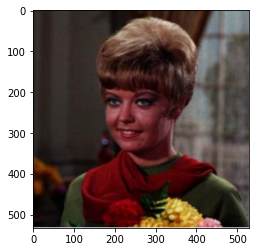

In [28]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/imgPraktikum.jpg')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


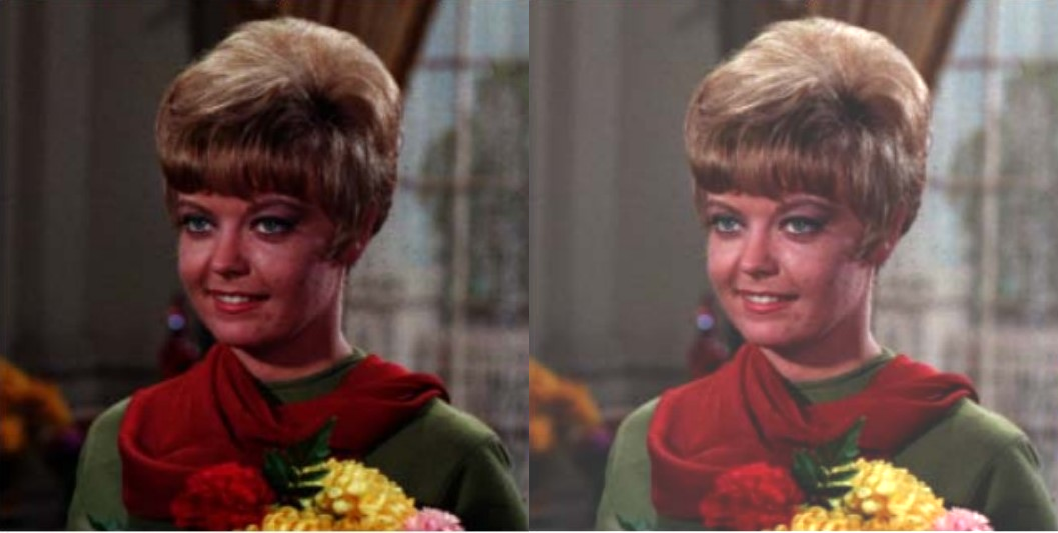

In [29]:
print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Colab Notebooks/imgPraktikum.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
# for y in range(original.shape[0]):
#     for x in range(original.shape[1]):
#         for c in range(original.shape[2]):
#             brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS**

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


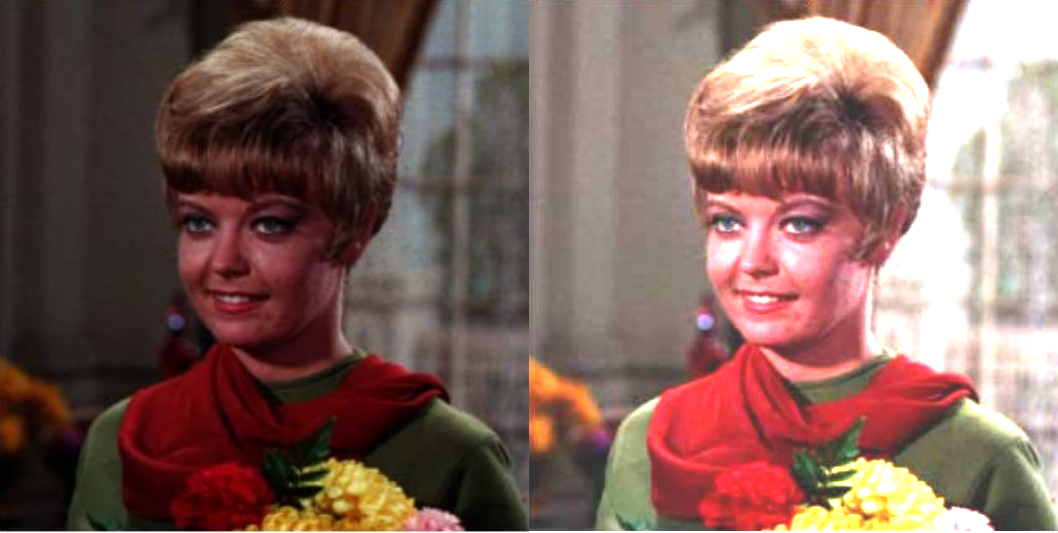

In [30]:
# 1
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try :
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')


original = cv.imread('/content/drive/MyDrive/Colab Notebooks/imgPraktikum.jpg')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)


final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 80


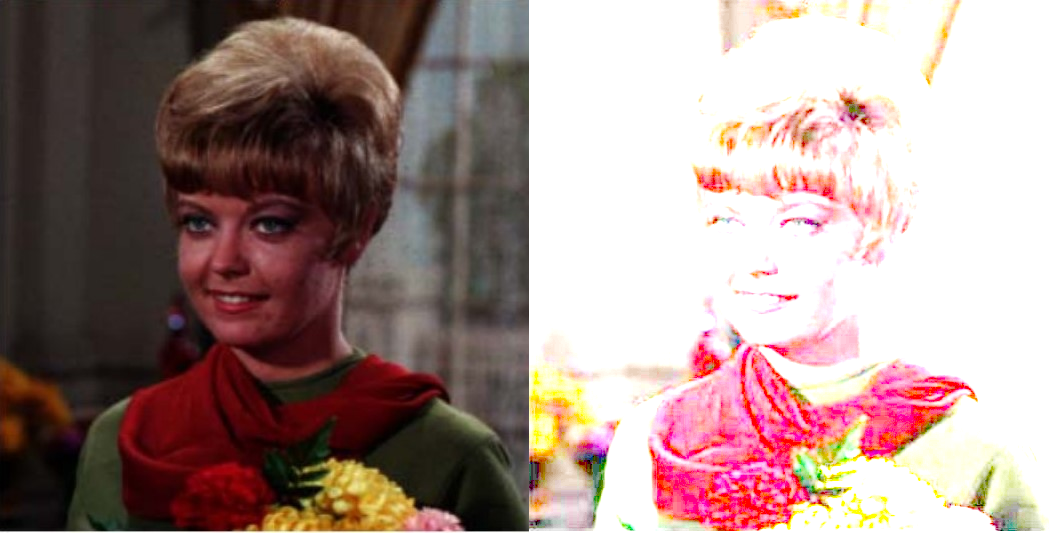

In [31]:
# 2
# nomor 2
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Colab Notebooks/imgPraktikum.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

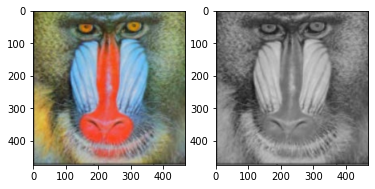

In [34]:
# 3.1 Averaging

img_m = cv.imread('/content/drive/MyDrive/Colab Notebooks/imgTugas.jpg')
img_rgb = cv.cvtColor(img_m,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB

img_avg = cv.imread('/content/drive/MyDrive/Colab Notebooks/imgTugas.jpg')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

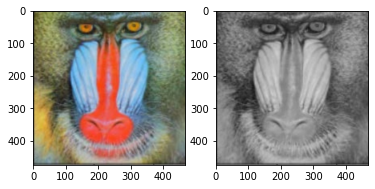

In [35]:
# 3.b Lightness
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/imgTugas.jpg')
img[:] = np.max(img,axis=-1,keepdims=10)/2+np.min(img,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img)

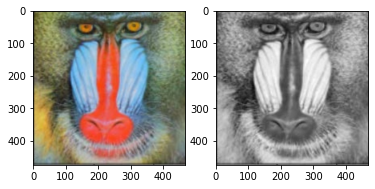

In [36]:
# 3.c Luminance
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/imgTugas.jpg')
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
image_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(image_lum, cmap='gray')

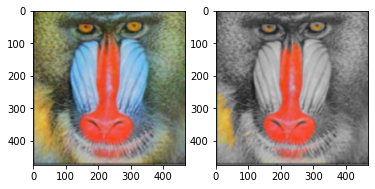

In [37]:
# nomor 4
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/imgTugas.jpg')
ret, mask = cv.threshold(img[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_rgb, mask3)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')